In [18]:
# Is your molecular dynamics simulation stable, or ready to explode? 
# Use this script to quickly plot temperature and total energy. 

import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# standard output from lammps software run 
fileName = 'out.lammps' 

In [15]:
enCol = 10
tempCol = 2
skipLines = 0

In [10]:
outFile = open(fileName, 'r')

In [11]:
# determine where the actual data starts and ends
counter = 0
startLine = 0
endLine = 0
for line in outFile:
        counter += 1
        if 'Step Temp PotEng E_vdwl' in line:
                startLine = counter
                tokens = line.split()
                enCol = tokens.index('TotEng')
                tempCol = tokens.index('Temp')
        if 'Loop time of' in line:
                endLine = (counter-1)

In [12]:
if endLine != 0:
        endLine = counter - endLine + 1
startLine = startLine+int(skipLines)
outFile.close()

In [14]:
# read data into pandas dataframe, convert to numpy array 
pandaFrame = pd.read_table(fileName, header=None, delim_whitespace=True, skiprows=startLine, skipfooter=endLine,engine='python')
npArray = pandaFrame.values
npArray = np.transpose(npArray)
npArray = npArray.astype(float)

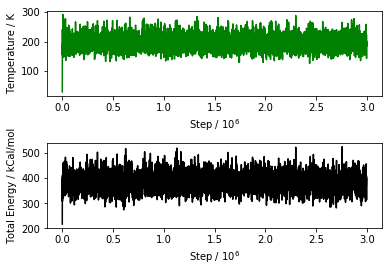

In [21]:
# first subplot (temperature)
ax1 = plt.subplot(211)
plt.plot(npArray[0]/1000000, npArray[tempCol], 'g-', label = '')
plt.xlabel('Step / 10$^6$')
plt.ylabel('Temperature / K')
# second subplot (total energy)
ax2 = plt.subplot(212)
plt.plot(npArray[0]/1000000, npArray[enCol], 'k-', label = '')
plt.xlabel('Step / 10$^6$')
plt.ylabel('Total Energy / kCal/mol')
plt.subplots_adjust(hspace=0.55)
plt.show()